In [1]:
from shogun import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn import svm
from shogun import *
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('../data/vid-game.csv')
df = dataframe.dropna()

df.shape

(6825, 16)

In [3]:
# training set
col_x = [col for col in df.columns
      if col != 'Genre']
X_train = df[col_x]

# X_train.head()

In [4]:
# target variable
target = ['Genre']
y_train = df[target]

In [5]:
X_train = X_train.drop(columns=['Name'],axis=0) #Name variable doesn't hold much info
# X_train.columns


In [6]:
#Now we have only the categorical variable
encoder = LabelEncoder()
s = (X_train.dtypes == 'object')
cat_vars= list(s[s].index)

# X_train[cat_vars].notna()

In [7]:
#  Labeling properly the columns with object data type
le = LabelEncoder()

label_X = X_train.copy()
for col in cat_vars:
    label_X[col] = le.fit_transform(label_X[col])
y_train = le.fit_transform(y_train)  #Convert to float    

#Convert features and labels suitable for shogun
label_X= label_X.to_numpy().astype(float)
y_train = y_train.astype(float)
y_train = y_train.reshape(y_train.shape[0],) #reshape to (num_samples,)


In [8]:
#Parameters for plotting
time_skl = []
time_sgn = []
time_diff = []
accuracy_skl=[]
accuracy_sgn=[]
size = [1000,2000,3000,4000,5000,6000,7000,8000,9000]

In [9]:
for m in size:
    print(m)


#SKLEARN
    label_X_temp = label_X[:m]
    y_train_temp = y_train[:m]
    skr = svm.SVC()

    t0 = time()
    skr.fit(label_X, y_train)
    tsk1 = time() - t0

    y_predict = skr.predict(label_X_temp)
    accuracy_skl.append(accuracy_score(y_train_temp,y_predict))
    
    


#SHOGUN
    train_features = RealFeatures(label_X_temp.T)
    labels_train = MulticlassLabels(y_train_temp)

    
    C = 1.0
    epsilon = 0.001
    gauss_kernel = GaussianKernel(train_features, train_features, 15)

    sg_svm = MulticlassLibSVM(C, gauss_kernel, labels_train)
    sg_svm.set_epsilon(epsilon)


    t0 = time()
    sg_svm.train()
    tsg1= time() - t0
    labels_predict=sg_svm.apply_multiclass(train_features)
    labels_predict = np.array(labels_predict.get_labels())
    accuracy_sgn.append(accuracy_score(y_train_temp,labels_predict))

    
    print("Sklearn time:  " + str(tsk1))
    print("SKL Accuracy: " + str(accuracy_score(y_train_temp,y_predict)))
    print("Shogun time: " + str(tsg1))
    print("Shogun Accuracy: " + str(accuracy_score(y_train_temp,labels_predict)))
    print('\n')
    
    time_skl.append(tsk1)
    time_sgn.append(tsg1)
    time_diff.append(tsk1-tsg1)


1000
Sklearn time:  5.515847206115723
SKL Accuracy: 0.267
Shogun time: 0.7239785194396973
Shogun Accuracy: 1.0


2000
Sklearn time:  5.554903745651245
SKL Accuracy: 0.2505
Shogun time: 1.760286808013916
Shogun Accuracy: 1.0


3000
Sklearn time:  5.178657293319702
SKL Accuracy: 0.24866666666666667
Shogun time: 4.672944068908691
Shogun Accuracy: 1.0


4000
Sklearn time:  4.6584084033966064
SKL Accuracy: 0.25125
Shogun time: 7.70880126953125
Shogun Accuracy: 0.99975


5000
Sklearn time:  5.236284971237183
SKL Accuracy: 0.254
Shogun time: 11.602195262908936
Shogun Accuracy: 0.9998


6000
Sklearn time:  5.252366304397583
SKL Accuracy: 0.25133333333333335
Shogun time: 17.94439959526062
Shogun Accuracy: 0.9998333333333334


7000
Sklearn time:  5.005055665969849
SKL Accuracy: 0.24483516483516485
Shogun time: 25.69170355796814
Shogun Accuracy: 0.9998534798534798


8000
Sklearn time:  5.271033525466919
SKL Accuracy: 0.24483516483516485
Shogun time: 26.453837633132935
Shogun Accuracy: 0.999853479

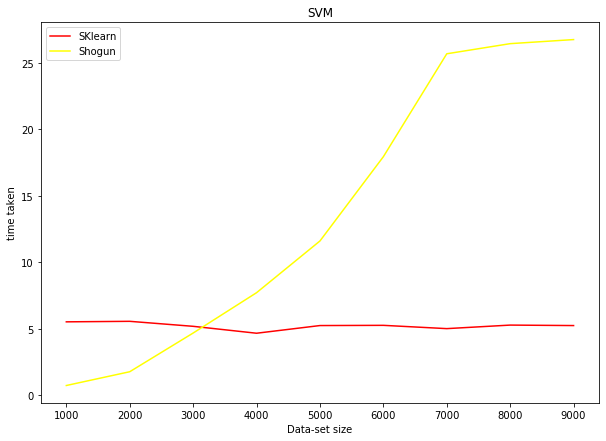

In [11]:
# PLOTTING ComputationTime
plt.figure(figsize=(10,7))
plt.title('SVM')
plt.plot(size,time_skl,color='red',label='SKlearn')
plt.plot(size,time_sgn,color='yellow',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('time taken')
plt.legend()

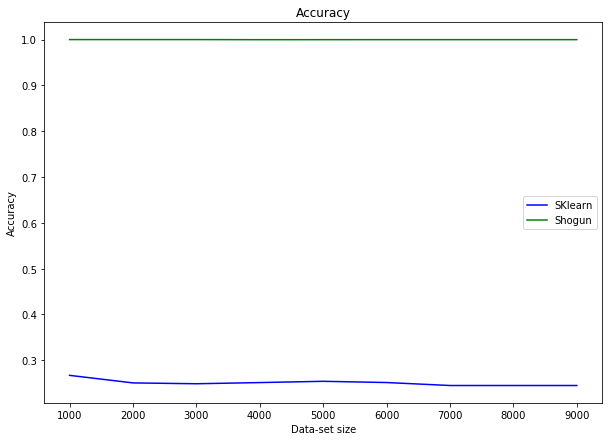

In [10]:
# PLOTTING Accuracy
plt.figure(figsize=(10,7))
plt.title('Accuracy')
plt.plot(size,accuracy_skl,color='blue',label='SKlearn')
plt.plot(size,accuracy_sgn,color='green',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('Accuracy')
plt.legend()